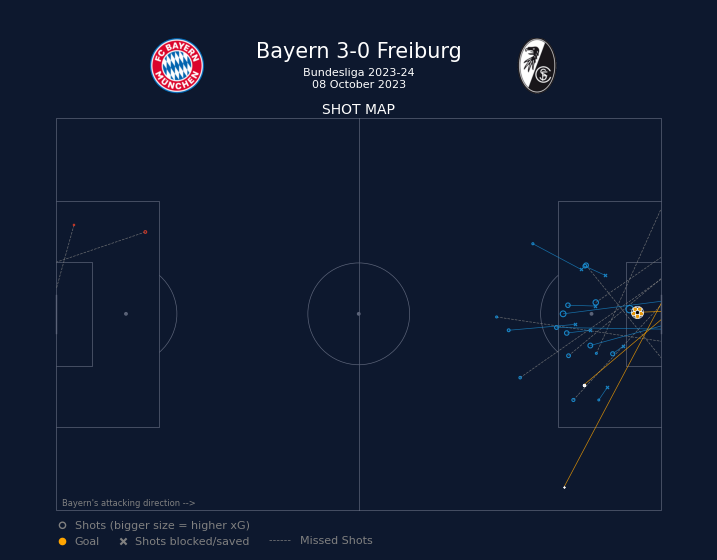

In [6]:
# %% Create Shot Map from a footbal match
#
# Inputs:   Shot event data frame
#           
# Outputs:  Shot map

# %% Imports and parameters
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image
import urllib
import warnings

# Import viztools module for plots and data preparation
import sys
sys.path.append('/Football Analysis')  
import Analysis_Tools.viztools as vt

# Ignore warnings
warnings.filterwarnings("ignore")

# Load data
xG_df = pd.read_csv('Data/FCB_SCF_final_shots.csv')

# Prepare display information of plot 
hteam = 'Bayern'
ateam = 'Freiburg'
score = '3-0'
league = 'Bundesliga'
season = '2023-24'
match_date = '08 October 2023'

# Create grids to plot: one for team logos, one for plot
fig = plt.figure(figsize=(9, 7), constrained_layout=False)
fig.set_facecolor("#0D182E")
gs = fig.add_gridspec(nrows=2, ncols=1,  height_ratios=[0.05, 1],hspace=0.3)

# Create grid for team logos
ax0=fig.add_subplot(gs[0,0:1])
ax0.set_facecolor("#0D182E")
ax0.axis("off")
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)

# Add team logos 
# For home team
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
hteam_image = Image.open(urllib.request.urlopen(f"{fotmob_url}{9823:.0f}.png"))
ax0 = fig.add_axes([0.27, 0.76, 0.08, 0.08])
ax0.imshow(hteam_image)
ax0.axis("off")
# For away team
ateam_image = Image.open(urllib.request.urlopen(f"{fotmob_url}{8358:.0f}.png"))
ax0 = fig.add_axes([0.67, 0.76, 0.08, 0.08])
ax0.imshow(ateam_image)
ax0.axis("off")

# Create grid for pitch
ax1= fig.add_subplot(gs[1,0:1])
ax1.set_facecolor("#0D182E")

# Plot the shot map by apply shot_map_xg() from viztools module
vt.shot_map_xg(xG_df, ax=ax1)

# Add legends and notes
ax1.scatter(1, -4, marker='o', facecolor='none', edgecolor='gray', s=20 )
ax1.scatter(1, -8, marker='o', facecolor='orange', edgecolor='orange', s=20 )
ax1.scatter(11, -8, marker='x', facecolor='gray', edgecolor='gray', s=20 )
ax1.text(3, -5, s="Shots (bigger size = higher xG)", color='gray', size=8)
ax1.text(3, -9, s="Goal", color='gray', size=8)
ax1.text(13, -9, s="Shots blocked/saved", color='gray', size=8)

legend_elements = [          
           Line2D([0], [0], linestyle='--', color='gray', label='Missed Shots', linewidth=0.5),
                  ]
legend_labels = ['Missed Shots']
ax1.legend(legend_elements, legend_labels, loc='upper center', bbox_to_anchor=(0.44, 0.052), fontsize=8, ncol=1, facecolor='none', edgecolor='none',labelcolor='gray' )

ax1.text(1, +1, s=f"{hteam}'s attacking direction -->", color='gray', size=6, ha='left')


ax1.text(50, 117, f"{hteam} {score} {ateam}", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=15
        )
ax1.text(50, 110, f"{league} {season}\n{match_date}", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=8
        )
ax1.text(50, 102, f"SHOT MAP", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=10
        )

plt.ylim(-10)
plt.savefig(f'Images\\Shots_Map.png', dpi=300, bbox_inches='tight', pad_inches=0.01)

In [2]:
xG_df.columns

Index(['Unnamed: 0', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal', 'cardType', 'isOwnGoal',
       'match_id', 'eventType', 'cumulative_mins', 'index', 'id',
       'home_team_id', 'away_team_id', 'ftScore', 'match_date',
       'progressive_pass', 'xThreat', 'xThreat_gen', 'lead_to_shot',
       'lead_to_goal', 'key_pass', 'isAssist', 'isCross', 'isCorner',
       'isFreekick', 'isGoalkick', 'is_offensive', 'is_bigchance',
       'is_penalty', 'is_own_goal', 'X', 'Y', 'EndX', 'EndY', 'BlockedX',
       'BlockedY', 'GoalMouthY', 'isblocked', 'body', 'isShotonTarget', 'name',
       'short_name', 'team_id', 'team_name', 'min', 'key', 'Outcome', 'xG',
       'Player', 'Minute'],
      dtype='object')

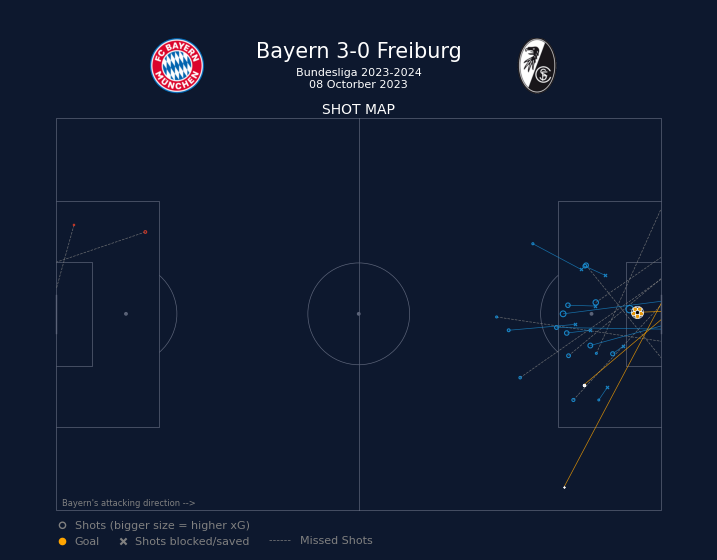

In [3]:
hteam = 'Bayern'
ateam = 'Freiburg'
score = '3-0'
legend_elements = [          
           Line2D([0], [0], linestyle='--', color='gray', label='Missed Shots', linewidth=0.5),
                  ]
legend_labels = ['Missed Shots']

# Add manual legend
fig = plt.figure(figsize=(9, 7), constrained_layout=False)
fig.set_facecolor("#0D182E")
gs = fig.add_gridspec(nrows=2, ncols=1,  height_ratios=[0.05, 1],hspace=0.3)

ax0=fig.add_subplot(gs[0,0:1])
ax0.set_facecolor("#0D182E")
ax0.axis("off")
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
#ateam="Nott'ham Forest"
if len(f"{hteam} {score} {ateam}")>30:
    logo_adj=0.05
else:
    logo_adj=0
    
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
hteam_image = Image.open(urllib.request.urlopen(f"{fotmob_url}{9823:.0f}.png"))
ax0 = fig.add_axes([0.27-logo_adj, 0.76, 0.08, 0.08])
ax0.imshow(hteam_image)
ax0.axis("off")
ateam_image = Image.open(urllib.request.urlopen(f"{fotmob_url}{8358:.0f}.png"))
ax0 = fig.add_axes([0.67+logo_adj, 0.76, 0.08, 0.08])
ax0.imshow(ateam_image)
ax0.axis("off")

# Pass networks
ax1= fig.add_subplot(gs[1,0:1])
ax1.set_facecolor("#0D182E")

vt.shot_map_xg(xG_df, ax=ax1)
ax1.scatter(1, -4, marker='o', facecolor='none', edgecolor='gray', s=20 )
ax1.scatter(1, -8, marker='o', facecolor='orange', edgecolor='orange', s=20 )
ax1.scatter(11, -8, marker='x', facecolor='gray', edgecolor='gray', s=20 )
#ax1.lines(20, -8, marker='-', facecolor='gray', edgecolor='gray', s=20 )
ax1.text(3, -5, s="Shots (bigger size = higher xG)", color='gray', size=8)
ax1.text(3, -9, s="Goal", color='gray', size=8)
ax1.text(13, -9, s="Shots blocked/saved", color='gray', size=8)
ax1.legend(legend_elements, legend_labels, loc='upper center', bbox_to_anchor=(0.44, 0.052), fontsize=8, ncol=1, facecolor='none', edgecolor='none',labelcolor='gray' )


ax1.text(1, +1, s=f"{hteam}'s attacking direction -->", color='gray', size=6, ha='left')

stat_font_size =9
'''
ax1.text(50, 70, "Possession", color='white', fontsize=stat_font_size, ha='center')
ax1.text(40, 70, f"{h_possession:.0f} %", color='white', fontsize=stat_font_size, ha='right',  bbox=dict(boxstyle='round', facecolor='orange'))
ax1.text(60, 70, f"{a_possession:.0f} %", color='white', fontsize=stat_font_size, ha='left',bbox=dict(boxstyle='round', facecolor='orange'))

ax1.text(50, 62, "Shots", color='white', fontsize=stat_font_size, ha='center')
ax1.text(40, 62, h_shot, color='white', fontsize=stat_font_size, ha='right',bbox=dict(boxstyle='round', facecolor='orange'))
ax1.text(60, 62, a_shot, color='white', fontsize=stat_font_size, ha='left',bbox=dict(boxstyle='round', facecolor='orange'))

ax1.text(50, 54, "Shots on target", color='white', fontsize=stat_font_size, ha='center')
ax1.text(40, 54, f"{h_sot} ({h_sot_acc:.0f}%)", color='white', fontsize=stat_font_size, ha='right',bbox=dict(boxstyle='round', facecolor='orange'))
ax1.text(60, 54, f"{a_sot} ({a_sot_acc:.0f}%)", color='white', fontsize=stat_font_size, ha='left',bbox=dict(boxstyle='round', facecolor='orange'))
hxG = xG_df[xG_df['teamId']==hid]['xG'].sum()
axG = xG_df[xG_df['teamId']==aid]['xG'].sum()
ax1.text(50, 46, "xG", color='white', fontsize=stat_font_size, ha='center')
ax1.text(40, 46, f"{hxG:.2f}", color='white', fontsize=stat_font_size, ha='right',bbox=dict(boxstyle='round', facecolor='orange'))
ax1.text(60, 46, f"{axG:.2f}", color='white', fontsize=stat_font_size, ha='left',bbox=dict(boxstyle='round', facecolor='orange'))
'''
if len(f"{hteam} {score} {ateam}")>=30:
    fs = 12
else:
    fs=15
ax1.text(50, 117, f"{hteam} {score} {ateam}", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=fs
        )
ax1.text(50, 110, f"Bundesliga 2023-2024\n08 Octorber 2023", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=8
        )
ax1.text(50, 102, f"SHOT MAP", 
         horizontalalignment='center',
         verticalalignment='center',
         color='white',
         fontsize=10
        )

plt.ylim(-10)
plt.savefig(f'Images\\Shots_Map.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
